In [1]:
import pandas as pd
import sqlalchemy as alch
from pathlib import Path
import matplotlib
import os
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
ROOT_DIR = Path(os.path.abspath(os.path.curdir)).parent
print(ROOT_DIR)

/home/tlsabara/Git/succotash


In [4]:
src_data = ROOT_DIR / 'idesp_collector' / 'arquivo_scrap.csv'


In [5]:
df = pd.read_csv(src_data)

/tmp/ipykernel_4662/196715292.py:1: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(src_data)


In [6]:
df.head()

,error_id,request_data,_REGICAO_NOME,_ANO,_DIRETORIA_ID,_MUNICIPIO_ID,_ESCOLA_ID,_ERROR_ID,_ERROR_INFOS,CODIGOCIE,...,DIRETORIA,MUNICIPIO,SERIE,IDPort,IDMat,IndDesemp,IndFluxo,IDESP,META,ORDEM
0,1.0,"{'escola': '040265', 'escola_nome': 'SANTA+RIT...",INTERIOR,2012,21101,448,40265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,"{'escola': '034265', 'escola_nome': 'HOMERO+CA...",INTERIOR,2012,21004,652,34265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,"{'escola': '035269', 'escola_nome': 'SYLAS+BAL...",INTERIOR,2012,21101,448,35269,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,"{'escola': '904223', 'escola_nome': 'ZILDA+COM...",INTERIOR,2012,21004,612,904223,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,"{'escola': '911884', 'escola_nome': 'MARIA+JOS...",INTERIOR,2012,21101,448,911884,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_erros = df[['error_id', 'request_data']]
df = df.drop(['error_id', 'request_data', '_ERROR_ID', '_ERROR_INFOS'], axis=1)

In [8]:
df.head()

,_REGICAO_NOME,_ANO,_DIRETORIA_ID,_MUNICIPIO_ID,_ESCOLA_ID,CODIGOCIE,ESCOLA,DIRETORIA,MUNICIPIO,SERIE,IDPort,IDMat,IndDesemp,IndFluxo,IDESP,META,ORDEM
0,INTERIOR,2012,21101,448,40265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INTERIOR,2012,21004,652,34265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INTERIOR,2012,21101,448,35269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INTERIOR,2012,21004,612,904223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INTERIOR,2012,21101,448,911884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().mean()

_REGICAO_NOME    0.000000
_ANO             0.000000
_DIRETORIA_ID    0.000000
_MUNICIPIO_ID    0.000000
_ESCOLA_ID       0.000000
CODIGOCIE        0.688024
ESCOLA           0.688024
DIRETORIA        0.688024
MUNICIPIO        0.688024
SERIE            0.688024
IDPort           0.688024
IDMat            0.688024
IndDesemp        0.688024
IndFluxo         0.688024
IDESP            0.688024
META             0.843213
ORDEM            0.688024
dtype: float64

# 68% das escolas sem dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55719 entries, 0 to 55718
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _REGICAO_NOME  55719 non-null  object 
 1   _ANO           55719 non-null  int64  
 2   _DIRETORIA_ID  55719 non-null  int64  
 3   _MUNICIPIO_ID  55719 non-null  int64  
 4   _ESCOLA_ID     55719 non-null  int64  
 5   CODIGOCIE      17383 non-null  float64
 6   ESCOLA         17383 non-null  object 
 7   DIRETORIA      17383 non-null  object 
 8   MUNICIPIO      17383 non-null  object 
 9   SERIE          17383 non-null  object 
 10  IDPort         17383 non-null  object 
 11  IDMat          17383 non-null  object 
 12  IndDesemp      17383 non-null  object 
 13  IndFluxo       17383 non-null  object 
 14  IDESP          17383 non-null  object 
 15  META           8736 non-null   object 
 16  ORDEM          17383 non-null  float64
dtypes: float64(2), int64(4), object(11)
memory usage: 

In [11]:
# NaN Replacement

df.fillna(0, inplace=True)
df.head()

,_REGICAO_NOME,_ANO,_DIRETORIA_ID,_MUNICIPIO_ID,_ESCOLA_ID,CODIGOCIE,ESCOLA,DIRETORIA,MUNICIPIO,SERIE,IDPort,IDMat,IndDesemp,IndFluxo,IDESP,META,ORDEM
0,INTERIOR,2012,21101,448,40265,0.0,0,0,0,0,0,0,0,0,0,0,0.0
1,INTERIOR,2012,21004,652,34265,0.0,0,0,0,0,0,0,0,0,0,0,0.0
2,INTERIOR,2012,21101,448,35269,0.0,0,0,0,0,0,0,0,0,0,0,0.0
3,INTERIOR,2012,21004,612,904223,0.0,0,0,0,0,0,0,0,0,0,0,0.0
4,INTERIOR,2012,21101,448,911884,0.0,0,0,0,0,0,0,0,0,0,0,0.0


In [12]:
df.columns

Index(['_REGICAO_NOME', '_ANO', '_DIRETORIA_ID', '_MUNICIPIO_ID', '_ESCOLA_ID',
       'CODIGOCIE', 'ESCOLA', 'DIRETORIA', 'MUNICIPIO', 'SERIE', 'IDPort',
       'IDMat', 'IndDesemp', 'IndFluxo', 'IDESP', 'META', 'ORDEM'],
      dtype='object')

In [13]:
# Correct columns types

cl = ['IDPort', 'IDMat', 'IndDesemp', 'IndFluxo', 'IDESP', 'META']

for i in cl:
    df[i] = df[i].apply(lambda x: str(x).replace(',', '.'))

df.IDMat = df['IDMat'].astype('float64')
df.IDPort = df['IDPort'].astype('float64')
df.IndDesemp = df['IndDesemp'].astype('float64')
df.IndFluxo = df['IndFluxo'].astype('float64')
df.META = df['IDMat'].astype('float64')


In [14]:
df.head()

,_REGICAO_NOME,_ANO,_DIRETORIA_ID,_MUNICIPIO_ID,_ESCOLA_ID,CODIGOCIE,ESCOLA,DIRETORIA,MUNICIPIO,SERIE,IDPort,IDMat,IndDesemp,IndFluxo,IDESP,META,ORDEM
0,INTERIOR,2012,21101,448,40265,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,INTERIOR,2012,21004,652,34265,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,INTERIOR,2012,21101,448,35269,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,INTERIOR,2012,21004,612,904223,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,INTERIOR,2012,21101,448,911884,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [99]:
df_categorical = df[['_ESCOLA_ID', 'CODIGOCIE', 'ESCOLA', '_DIRETORIA_ID', 'DIRETORIA', 'MUNICIPIO', '_REGICAO_NOME' ]]
df_performance = df[['_ESCOLA_ID','_ANO', 'SERIE', 'IDPort', 'IDMat', 'IndDesemp', 'IndFluxo', 'IDESP', 'META']]
# Uma escola não muda de cidade/diretoria/regiao




#### Nome das colunas para guardar apenas
'_REGICAO_NOME', '_ANO', '_DIRETORIA_ID', '_MUNICIPIO_ID', '_ESCOLA_ID',
       'CODIGOCIE', 'ESCOLA', 'DIRETORIA', 'MUNICIPIO', 'SERIE', 'IDPort',
       'IDMat', 'IndDesemp', 'IndFluxo', 'IDESP', 'META', 'ORDEM'

In [46]:
n_part_school = pd.DataFrame( df_categorical.groupby('_ESCOLA_ID')['ESCOLA'].count()).reset_index()
n_part_school.rename(columns={'ESCOLA':'QTD_LINES'}, inplace=True)
n_part_school.sort_values('QTD_LINES', ascending=False)

# Maiores escolas com 13 linhas

,_ESCOLA_ID,QTD_LINES
2898,40745,13
3407,49086,13
7018,903048,13
2006,26293,13
3163,45081,13
...,...,...
5240,245616,1
5241,245636,1
5242,245653,1
5243,245707,1


In [60]:
df_schools = df_categorical[df_categorical.ESCOLA != 0]
df_schools = df_schools.drop_duplicates()

In [67]:
df_schools.head()

,_ESCOLA_ID,CODIGOCIE,ESCOLA,_DIRETORIA_ID,DIRETORIA,MUNICIPIO,_REGICAO_NOME
1414,16937,16937.0,PEREIRA INACIO COMENDADOR,20310,VOTORANTIM,VOTORANTIM,INTERIOR
1416,31690,31690.0,SERAPHINA ETELVINA PAGLIUSO PROFESSORA,21006,TUPA,RINOPOLIS,INTERIOR
1417,37898,37898.0,FELIX GUISARD FILHO DOUTOR,20206,TAUBATE,TAUBATE,INTERIOR
1418,45548,45548.0,ELYSABETH DE MELLO RODRIGUES PROFESSORA,20415,SUMARE,SUMARE,INTERIOR
1420,42547,42547.0,ZORAIDE PROENCA KAYSEL PROFESSORA,20415,SUMARE,SUMARE,INTERIOR


In [75]:
df_schools = df_schools.merge(n_part_school, how='left', on='_ESCOLA_ID')

TypeError: 'Text' object is not callable

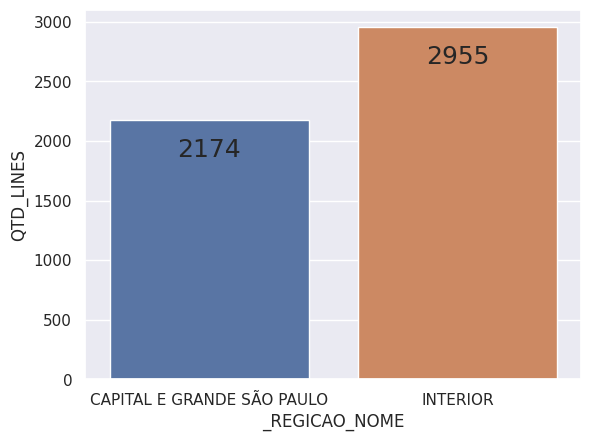

In [89]:
sns.set_theme()
d1 = df_schools.groupby('_REGICAO_NOME').count().reset_index()
# Create a visualization
ax = sns.barplot(
    data=d1,
    x="_REGICAO_NOME",
    y="QTD_LINES",
)

ax.bar_label(ax.containers[0], padding=-30, fontsize=18)


In [100]:
df_performance.head()

,_ESCOLA_ID,_ANO,SERIE,IDPort,IDMat,IndDesemp,IndFluxo,IDESP,META
0,40265,2012,0,0.0,0.0,0.0,0.0,0,0.0
1,34265,2012,0,0.0,0.0,0.0,0.0,0,0.0
2,35269,2012,0,0.0,0.0,0.0,0.0,0,0.0
3,904223,2012,0,0.0,0.0,0.0,0.0,0,0.0
4,911884,2012,0,0.0,0.0,0.0,0.0,0,0.0


In [101]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55719 entries, 0 to 55718
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _ESCOLA_ID  55719 non-null  int64  
 1   _ANO        55719 non-null  int64  
 2   SERIE       55719 non-null  object 
 3   IDPort      55719 non-null  float64
 4   IDMat       55719 non-null  float64
 5   IndDesemp   55719 non-null  float64
 6   IndFluxo    55719 non-null  float64
 7   IDESP       55719 non-null  object 
 8   META        55719 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.8+ MB


In [102]:
df_performance.sample(30)

,_ESCOLA_ID,_ANO,SERIE,IDPort,IDMat,IndDesemp,IndFluxo,IDESP,META
5468,14400,2019,3º ANO EM,3.7443,1.7587,2.75,0.9294,2.56,1.7587
50118,28800,2013,0,0.0000,0.0000,0.00,0.0000,0,0.0000
10998,32347,2021,5º ANO EF,4.4440,6.2957,5.37,1.0000,5.37,6.2957
2484,914997,2021,3º ANO EM,2.9930,1.3613,2.18,1.0000,2.18,1.3613
4678,34459,2019,9º ANO EF,3.7963,3.6107,3.70,0.9694,3.59,3.6107
50532,924556,2013,0,0.0000,0.0000,0.00,0.0000,0,0.0000
54331,127814,2012,0,0.0000,0.0000,0.00,0.0000,0,0.0000
20635,191243,2018,0,0.0000,0.0000,0.00,0.0000,0,0.0000
2401,919731,2021,5º ANO EF,6.4053,5.2287,5.82,1.0000,5.82,5.2287
34897,32839,2014,0,0.0000,0.0000,0.00,0.0000,0,0.0000


In [103]:
df_performance['IDESP'] = df_performance['IDESP'].astype('float64')

/tmp/ipykernel_4662/3493498453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_performance['IDESP'] = df_performance['IDESP'].astype('float64')


In [104]:
df_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55719 entries, 0 to 55718
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _ESCOLA_ID  55719 non-null  int64  
 1   _ANO        55719 non-null  int64  
 2   SERIE       55719 non-null  object 
 3   IDPort      55719 non-null  float64
 4   IDMat       55719 non-null  float64
 5   IndDesemp   55719 non-null  float64
 6   IndFluxo    55719 non-null  float64
 7   IDESP       55719 non-null  float64
 8   META        55719 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 3.8+ MB


In [105]:
df_performance.describe()

,_ESCOLA_ID,_ANO,IDPort,IDMat,IndDesemp,IndFluxo,IDESP,META
count,55719.000000,55719.000000,55719.000000,55719.000000,55719.000000,55719.000000,55719.000000,55719.000000
mean,278154.104794,2016.510885,1.169470,0.862789,1.016158,0.301271,0.986888,0.862789
std,382823.911015,2.897123,1.861412,1.500661,1.666522,0.448417,1.633142,1.500661
min,12.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17243.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37722.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,900357.000000,2019.000000,2.800000,1.538700,2.210000,0.940200,2.080000,1.538700
max,926103.000000,2021.000000,9.166700,10.000000,9.580000,1.000000,9.580000,10.000000
